In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import tensorflow
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [46]:
# Load data
test = pd.read_csv('Google_Stock_Price_Test.csv')
train = pd.read_csv('Google_Stock_Price_Train.csv')

# data transformation
train_set = train.iloc[:,1:2].values
minmaxsc = MinMaxScaler()
train_set_scaled = minmaxsc.fit_transform(train_set)

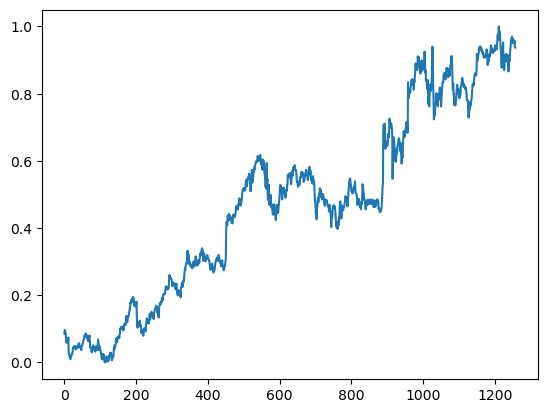

In [47]:
plt.plot(train_set_scaled)
plt.show()

In [48]:
x_train, y_train = [], []
for i in range(120, len(train_set_scaled)):
    x_train.append(train_set_scaled[i-120:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## RNN

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split=0.1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.4958 - val_loss: 0.0455
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3470 - val_loss: 0.0164
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2279 - val_loss: 0.0127
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2454 - val_loss: 0.0030
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1472 - val_loss: 0.0094
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1237 - val_loss: 8.5279e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1106 - val_loss: 0.0043
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0916 - val_loss: 0.0045
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0838 - val_loss: 0.0027
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0685 - val_loss: 0.0117
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0599 - val_loss: 9.5505e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - l

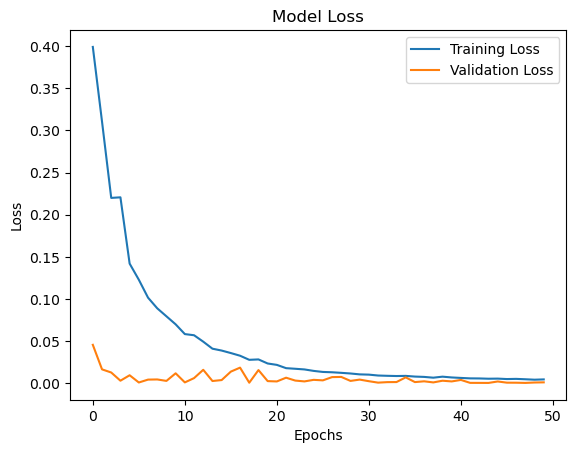

In [50]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [51]:
# test data
real_stock_price = test.iloc[:,1:2].values
dataset = pd.concat((train['Open'], test['Open']), axis=0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = minmaxsc.transform(inputs)

In [52]:
x_test = []
for i in range(120, 140):
    x_test.append(inputs[i-120:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
# predictions
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = minmaxsc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


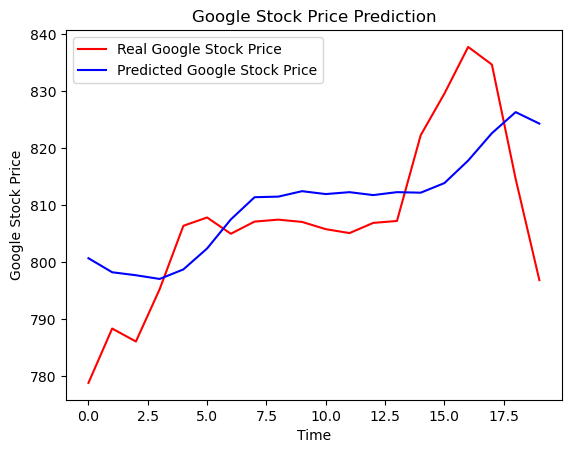

In [54]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## LSTM

In [55]:
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1))

opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

In [56]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - loss: 0.0691 - val_loss: 0.0022
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 0.0058 - val_loss: 0.0075
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0047 - val_loss: 0.0066
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0045 - val_loss: 0.0080
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step

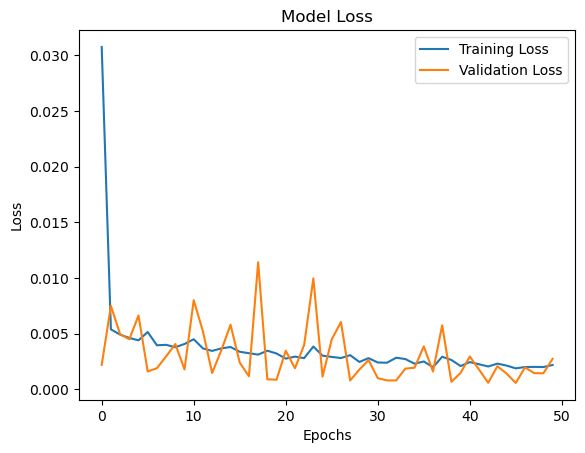

In [57]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [19]:
# test data
real_stock_price = test.iloc[:,1:2].values
dataset = pd.concat((train['Open'], test['Open']), axis=0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = minmaxsc.transform(inputs)

In [20]:
x_test = []
for i in range(120, 140):
    x_test.append(inputs[i-120:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# predictions
predicted_stock_price = model.predict(x_test)
predicted_stock_price = minmaxsc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


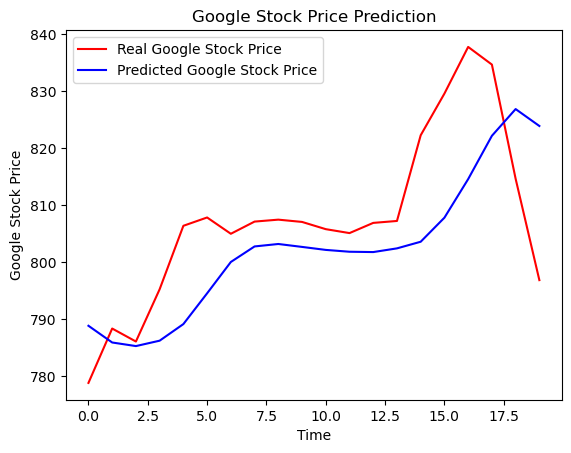

In [22]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()